## Necessary Imports

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook
import pickle
import copy

##### To convert a string bit sequence to palindrome number

In [ ]:
 def get_number_from_pal(str_num):
    return np.fromiter((int(bit) for bit in str_num), dtype=np.int8)

#### Creating the dataset for training using 4-fold cross validation

In [ ]:
# Generating palindrome data

def is_pal(X):
    return X == X[::-1]

def generate_10_bit_binary_numbers():
    binary_numbers = []

    for i in range(2**10):
        binary_str = format(i, '010b')
        binary_numbers.append(binary_str)

    return binary_numbers


# Generate and store all 10-bit binary numbers
binary_numbers_list = generate_10_bit_binary_numbers()


Y_VALUES = []
X_VALUES = []

# Print and/or use the generated binary numbers as needed
for binary_number in binary_numbers_list:
    #print(binary_number)
    if is_pal(binary_number) == True:
        X_VALUES.append(get_number_from_pal(binary_number))
        Y_VALUES.append(1)
    else:
        X_VALUES.append(get_number_from_pal(binary_number))
        Y_VALUES.append(0)

#### Checking the shape of the dataset created

In [ ]:
X = np.array(X_VALUES)
Y = np.array(Y_VALUES)
print("X = ",X.shape)
print("Y = ",Y.shape)


X =  (1024, 10)
Y =  (1024,)


In [ ]:
np.sum(Y==1)

32

### Define the Precision, Recall and F1 score metrics

In [ ]:
def precision(result, reference):
    result = np.array(result)
    reference = np.array(reference)
    result = np.atleast_1d(result.astype(np.bool_))
    reference = np.atleast_1d(reference.astype(np.bool_))

    tp = np.count_nonzero(result & reference)
    fp = np.count_nonzero(result & ~reference)

    try:
        precision = tp / float(tp + fp)
    except ZeroDivisionError:
        precision = 0.0

    return precision

In [ ]:
def recall(result, reference):
    result = np.array(result)
    reference = np.array(reference)
    result = np.atleast_1d(result.astype(np.bool_))
    reference = np.atleast_1d(reference.astype(np.bool_))

    tp = np.count_nonzero(result & reference)
    fn = np.count_nonzero(~result & reference)

    try:
        recall = tp / float(tp + fn)
    except ZeroDivisionError:
        recall = 0.0

    return recall

In [ ]:
def f1_score(p, r):
  return (2*p*r)/(p+r)

#### Multi Layer Perceptron using input, hidden and output layer

In [ ]:

class MLP:
  def __init__(self, input, hidden):
    self.w1 = np.random.rand(input, hidden)
    self.w2 = np.random.rand(hidden, 1)

    # self.w1 = np.random.uniform(low =-1, high =1, size=(input, hidden))
    # self.w2 = np.random.uniform(low =-1, high =1, size= (hidden, 1))

    # self.b1 = np.random.rand(hidden,1)
    # self.b2 = np.random.rand(1,1)

    self.velocity_w1 = np.zeros_like(self.w1)
    self.velocity_w2 = np.zeros_like(self.w2)

    # self.velocity_b1 = np.zeros_like(self.b1)
    # self.velocity_b2 = np.zeros_like(self.b2)

    self.momentum = 0.95

    self.hidden = hidden
    self.input = input


  def relu(self, x):
    return np.maximum(x,0)

  def relu_prime(self,x):
    if x>0:
      return 1
    else:
      return 0

  def sigmoid(self,x):
    # return 1 / (1 + np.exp(-x))
    return np.exp(-np.logaddexp(0, -x))


  def sigmoid_prime(self,x):
    z = self.sigmoid(x)
    return z*(1-z)

  def forward(self, x):
    # forward
    z1 = self.w1.T @ x #+ self.b1
    a1 = self.relu(z1)

    z2 = self.w2.T @ a1 #+ self.b2
    a2 = self.sigmoid(z2)

    return a2

  def forward_backward(self, x, y, lr):

    # forward
    z1 = self.w1.T @ x #+ self.b1
    a1 = self.relu(z1)

    z2 = self.w2.T @ a1 #+ self.b2
    a2 = self.sigmoid(z2)

    # backprop
    self.dw1 = np.zeros_like(self.w1)
    self.dw2 = np.zeros_like(self.w2)

    # self.db1 = np.zeros_like(self.b1)
    # self.db2 = np.zeros_like(self.b2)

    L = -y*np.log(a2 + 1e-6) - (1-y)*np.log(1-a2 + 1e-6)
    # da2 = -y/a2 + (1-y)/(1-a2)

    for i in range(self.hidden):
      # self.dw2[i,0] = (-y[0,0]*(1-a2[0,0]) + (1- y[0,0])*a2[0,0]) * a1[i,0]
      self.dw2[i,0] = (a2[0,0]- y[0,0]) * a1[i,0]


    # self.db2[0,0] = (-y[0,0]*(1-a2[0,0]) + (1- y[0,0])*a2[0,0])

      #self.dw2[i,0] = da2[0,0] * self.sigmoid_prime(z2[0,0]) * a1[i,0]

    for i in range(self.input):
      for j in range(self.hidden):
        # self.dw1[i,0] = da2[0,0] * self.sigmoid_prime(z2[0,0]) * self.w2[j,0] * self.relu_prime(z1[j,0]) * x[i,0]
        # self.dw1[i,j] = (-y[0,0]*(1-a2[0,0]) + (1- y[0,0])*a2[0,0])  * self.w2[j,0] * self.relu_prime(z1[j,0]) * x[i,0]

        self.dw1[i,j] = (a2[0,0]- y[0,0])  * self.w2[j,0] * self.relu_prime(z1[j,0]) * x[i,0]

      # self.db1[j,0] = (-y[0,0]*(1-a2[0,0]) + (1- y[0,0])*a2[0,0])  * self.w2[j,0] * self.relu_prime(z1[j,0])


    '''
    # update
    self.w1 = self.w1 - lr*self.dw1
    self.w2 = self.w2 - lr*self.dw2

    self.b1 = self.b1 - lr*self.db1
    self.b2 = self.b2 - lr*self.db2

    '''
    self.velocity_w1 = self.momentum * self.velocity_w1 + (1 - self.momentum) * self.dw1
    self.velocity_w2 = self.momentum * self.velocity_w2 + (1 - self.momentum) * self.dw2

    self.w1 = self.w1 - lr*self.velocity_w1
    self.w2 = self.w2 - lr*self.velocity_w2

    # print (np.linalg.norm(self.dw1))

    return a2 , L


#### Inference of test

In [ ]:
# eval
THRESHOLD = 0.5
def inference(X_test, Y_test):
    print ('=== Inference ===')
    correct = 0
    ALL_PREDS = []
    ALL_YS = []
    for itr in range(len(X_test)):

        x = X_test[itr:itr+1,:].T
        y = Y_test[itr,0]

        y_pred = net.forward(x)

        y_pred = y_pred[0,0]

        # print (y_pred)

        if y_pred < THRESHOLD:
            y_pred = 0
        else:
            y_pred = 1
        ALL_PREDS.append(y_pred)
        ALL_YS.append(y)
        if (y_pred == y):
            correct +=1

    print('Correctly classified: ', correct)
    return (ALL_PREDS, ALL_YS)

#### Create history for dumping

In [ ]:
! mkdir history

#### Set the seed before training

In [ ]:
# Set the seed for NumPy
np.random.seed(42)

# Set the seed for the built-in random module
random.seed(42)

# Get the number of samples
num_samples = X.shape[0]

# Shuffle indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

In [ ]:
pos_ind = [i for i in range(len(Y)) if Y[i]==1]
neg_ind = [i for i in range(len(Y)) if Y[i]==0]

k =  4 # Set the number of folds (k)
# You can adjust this based on your preference

split_arrays_pos = np.array_split(pos_ind, k)
split_arrays_neg = np.array_split(neg_ind, k)


In [ ]:
fold_indices = []
for i in range(k):
  # print (split_arrays_pos[i])
  part = np.concatenate((split_arrays_pos[i], split_arrays_neg[i]))
  fold_indices.append(part)

## Training Loop

In [ ]:


# Iterate over the folds
for i in range(k):
    print("FOLD = ",i)

    # init model for this fold
    net = MLP(10, 16)

    test_indices = fold_indices[i]
    train_indices = np.concatenate([fold_indices[j] for j in range(k) if j != i])

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    Y_test = Y_test.reshape(Y_test.shape[0],1)
    Y_train = Y_train.reshape(Y_train.shape[0],1)
    # Your training and testing code goes here
    # For example, you can train your model using X_train, Y_train, and then evaluate on X_test, Y_test
    # print("X_test = ",X_test.shape," Y_test",Y_test.shape)

    TOTAL_EPOCHS = 1000
    LOSS_LIST = []
    for epoch in tqdm_notebook(range(TOTAL_EPOCHS)):
        total = 0
        for itr in range(len(X_train)):
            x = X_train[itr:itr+1,:].T
            # y = Y[itr:itr+1,:]
            y = Y_train[itr:itr+1,:]
            # print("x shape = ",x.shape," y shape = ",y.shape)

            y_pred, L = net.forward_backward(x,y,1e-2)

            total += L
        LOSS_LIST.append(total[0][0])
        # print ('Epoch: ',epoch, '/ Fold: ',i,' Loss: ', total[0][0])
        # print("--i = ",i)
        with open("history/train_logs_fold_{}.txt".format(str(i)), "a") as text_file:
            text_file.write("{} {:.6f} \n".format(epoch, total[0][0]))
        # print ("====")

    ALL_PREDS, ALL_YS = inference(X_test, Y_test)
    print("LOSS LIST = ",LOSS_LIST)
    plt.title('Loss vs epochs')
    # Set axis labels
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(LOSS_LIST)
    plt.savefig('Loss_fold_{}.png'.format(i), bbox_inches='tight')
    plt.close()

    print("ALL PREDS = ",ALL_PREDS)
    print("ALL YS = ",ALL_YS)
    precision_val = precision(ALL_PREDS, ALL_YS)
    print("precision ==> ",precision_val)

    recall_val = recall(ALL_PREDS, ALL_YS)
    print("recall ==> ",recall_val)

    f1_val = f1_score(precision_val, recall_val)
    print("F1 ==> ",f1_val)

    with open("history/precision_fold_{}.txt".format(str(i)), "a") as text_file:
            text_file.write("{:.6f} \n".format(precision_val))
    # if epoch%20==0:
    #     inference(X_test, Y_test)

    file_name = f'history/fold_{i}_model.pkl'

    with open(file_name, 'wb') as file:
        pickle.dump(net, file)
        print(f'Weights successfully saved to "{file_name}"')


FOLD =  0


<ipython-input-14-c1df3bcb5043>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(TOTAL_EPOCHS)):


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

#### Compress the history

In [ ]:
! zip -r history.zip history/

updating: history/ (stored 0%)
updating: history/train_logs_fold_0.txt (deflated 49%)


#### Inference time

In [ ]:
y_pred_list = []

for i in range(len(X)):
    x = X[i:i+1,:].T
    y = Y[i,0]

    y_pred = net.forward(x)

    y_pred = y_pred[0,0]

    y_pred_list.append(y_pred)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

#Demo Code

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook
import pickle
import copy

#### Download the pre-trained model

In [ ]:
! wget "https://github.com/Jimut123/simply_junk/raw/main/models/history.zip"

--2024-02-20 06:26:00--  https://github.com/Jimut123/simply_junk/raw/main/models/history.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jimut123/simply_junk/main/models/history.zip [following]
--2024-02-20 06:26:00--  https://raw.githubusercontent.com/Jimut123/simply_junk/main/models/history.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52914 (52K) [application/zip]
Saving to: ‘history.zip’

history.zip         100%[===================>]  51.67K  --.-KB/s    in 0.01s   

2024-02-20 06:26:00 (3.68 MB/s) - ‘history.zip’ saved [52914/52914]



In [ ]:
!unzip '/content/history.zip'

Archive:  /content/history.zip
  inflating: history/train_logs_fold_2.txt  
  inflating: history/precision_fold_1.txt  
  inflating: history/train_logs_fold_1.txt  
  inflating: history/fold_1_model.pkl  
  inflating: history/train_logs_fold_3.txt  
  inflating: history/fold_0_model.pkl  
  inflating: history/precision_fold_0.txt  
  inflating: history/fold_3_model.pkl  
  inflating: history/train_logs_fold_0.txt  
  inflating: history/precision_fold_2.txt  
  inflating: history/fold_2_model.pkl  
  inflating: history/precision_fold_3.txt  


In [ ]:
import numpy as np

In [ ]:
with open ('/content/history/fold_3_model.pkl', 'rb' ) as f:
    model = pickle.load(f)

#### Demo of any random 10-digit bit sequence given as input

In [ ]:
# INPUT = [1,0,1,1,1,1,1,1,1,1]
INPUT = [1,0,1,0,0,0,0,1,0,1]

In [ ]:
pred = model.forward(INPUT)
if pred<0.5:
  print("The number isn't palindrome")
else: print("The number is palindrome")

The number is palindrome


#### Visualize the weights

Max =  2.360399392750456  Min =  -2.3593158329815704


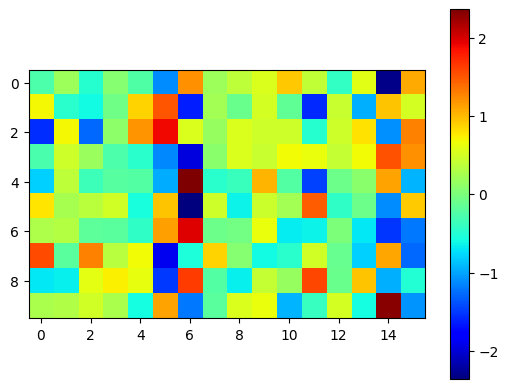

In [ ]:
# net.w1.shape
print("Max = ",np.max(model.w1)," Min = ",np.min(model.w1))
fig= plt.imshow(model.w1,cmap='jet')
plt.colorbar(fig)
plt.savefig("w1_weights_viz_net.png", bbox_inches='tight', pad_inches=0, dpi=500)
# plt.savefig("w1_weights_viz_net.eps", bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

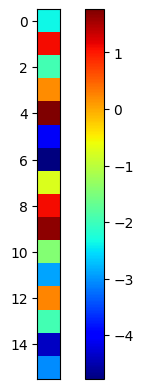

In [ ]:
fig = plt.imshow(model.w2,cmap='jet')
plt.colorbar(fig)
plt.xticks([])
plt.savefig("w2_weights_viz_net.png", bbox_inches='tight', pad_inches=0, dpi=500)
# plt.savefig("w2_weights_viz_net.eps", bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

#### Plot the velocity of the w1 and w2

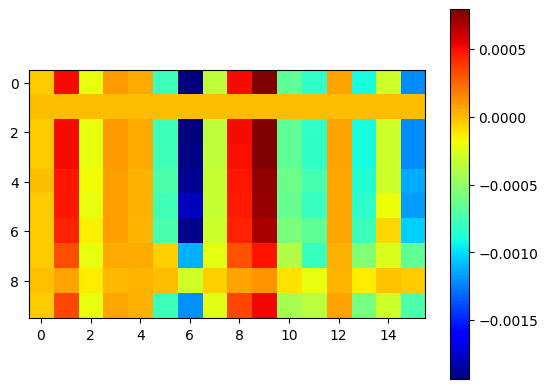

In [ ]:
fig = plt.imshow(model.velocity_w1,cmap='jet')
plt.colorbar(fig)
plt.savefig("velocity_w1_viz_net.png", bbox_inches='tight', pad_inches=0, dpi=500)
# plt.savefig("velocity_w1_viz_net.eps", bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

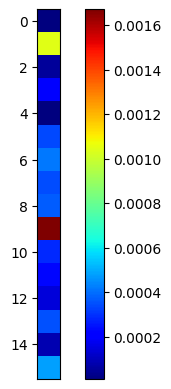

In [ ]:
fig = plt.imshow(model.velocity_w2,cmap='jet')
plt.colorbar(fig)
plt.xticks([])
plt.savefig("velocity_w2_viz_net.png", bbox_inches='tight', pad_inches=0, dpi=500)
# plt.savefig("velocity_w2_viz_net.eps", bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

#### Code to plot the confusion metrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, fold_no, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='rocket_r')
    #plt.savefig(filename)
    plt.savefig('confusion_matrix_fold_{}.png'.format(fold_no),bbox_inches='tight', pad_inches=0, dpi=500)
    # plt.savefig('confusion_matrix.eps')
    #plt.show()


#### Finding the inference over all the folds and printing the confusion metrics

FOLD =  0
=== Inference ===
Correctly classified:  256
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-32-cd49880aa0d7>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


FOLD =  1
=== Inference ===
Correctly classified:  256
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-32-cd49880aa0d7>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


FOLD =  2
=== Inference ===
Correctly classified:  256
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-32-cd49880aa0d7>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


FOLD =  3
=== Inference ===
Correctly classified:  256
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<ipython-input-32-cd49880aa0d7>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


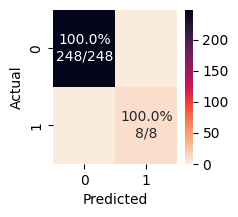

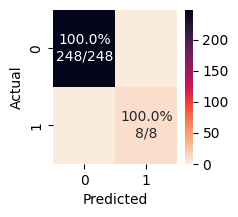

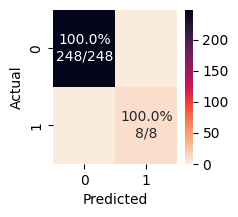

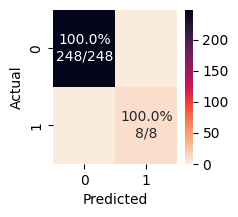

In [ ]:
# Iterate over the folds
k = 4
for i in range(k):
    print("FOLD = ",i)

    # init model for this fold
    # net = MLP(10, 16)

    with open ('./history/fold_{}_model.pkl'.format(i), 'rb' ) as f:
        net = pickle.load(f)

    test_indices = fold_indices[i]
    train_indices = np.concatenate([fold_indices[j] for j in range(k) if j != i])

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    Y_test = Y_test.reshape(Y_test.shape[0],1)
    Y_train = Y_train.reshape(Y_train.shape[0],1)
    # Your training and testing code goes here
    # For example, you can train your model using X_train, Y_train, and then evaluate on X_test, Y_test
    # print("X_test = ",X_test.shape," Y_test",Y_test.shape)

    # TOTAL_EPOCHS = 1000
    # LOSS_LIST = []
    # for epoch in tqdm_notebook(range(TOTAL_EPOCHS)):
    #     total = 0
    #     for itr in range(len(X_train)):
    #         x = X_train[itr:itr+1,:].T
    #         # y = Y[itr:itr+1,:]
    #         y = Y_train[itr:itr+1,:]
    #         # print("x shape = ",x.shape," y shape = ",y.shape)

    #         y_pred, L = net.forward_backward(x,y,1e-2)

    #         total += L
    #     LOSS_LIST.append(total[0][0])
    #     # print ('Epoch: ',epoch, '/ Fold: ',i,' Loss: ', total[0][0])
    #     # print("--i = ",i)
    #     with open("history/train_logs_fold_{}.txt".format(str(i)), "a") as text_file:
    #         text_file.write("{} {:.6f} \n".format(epoch, total[0][0]))
    #     # print ("====")

    ALL_PREDS, ALL_YS = inference(X_test, Y_test)
    print(ALL_PREDS, ALL_YS)
    cm_analysis(ALL_PREDS, ALL_YS, [0, 1] , fold_no = i, ymap=None,figsize=(2,2))